<a href="https://colab.research.google.com/github/abdou19-97/TeslaStockPrediciton/blob/main/TeslaStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [2]:
#import the necessary Libraries
import pandas as pd
import yfinance as yf
#load the data
df = yf.download(tickers='TSLA')
# df.index

[*********************100%***********************]  1 of 1 completed


In [3]:
# print(* (f"{i}: {col}" for i,col in enumerate(df.columns)), sep='\n')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500


In [4]:
from posixpath import split
import numpy as np
import datetime

#This function converts strings to datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

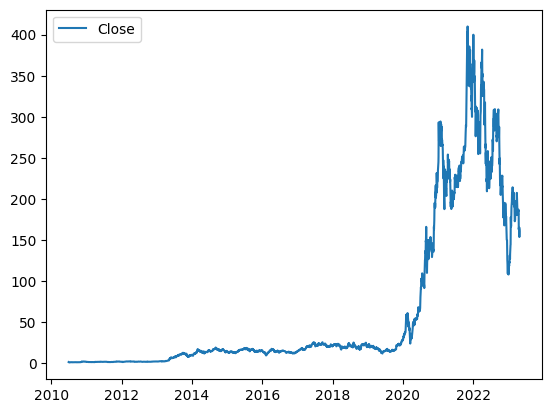

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df.index, df['Close'], label='Close')
#ax.plot(df.index, df['Open'], label='Open')
# ax.plot(df.index, df['High'], label='High')
# ax.plot(df.index, df['Low'], label='Low')
# ax.plot(df.index, df['Volume'], label='Volume')


ax.legend()

plt.show()

In [6]:
#Apply suppervised learning
#Function Name: df_to_window
#Parameters: dataframe, first_date_str, and last_date_str
#return: ret_df

#first_date_str and last_date_str
#repersent the first and last time period of intrest
# n represnt the size of the window of data to be included
#in each of the output dataframe
#The function returns a new pandas DataFrame that has been transformed
# according to the windowed data approach
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=5):
  
  #convert the parameters into datetime objects
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)
  
  #Initialize the target_date to first_date
  target_date = first_date
  
  #Initialize the following lists
  dates = []
  X, Y = [], []

  last_time = False
  #A while loop is used to iteratively create subsets of the input 
  #DataFrame for each window of data
  while True:
    #select a subset of the input DataFrame that includes 
    #all rows up to and including the target_date and only
    #the last n+1 rows of that subset
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    #Check whether the 'df_subset' contains exactly n+1 rows of data
    #If it doesn't, then there's not enough data available for the window size n
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    # Extracts the values of the 'Close' column from the 'df_subset'
    # Then converts them to numpy array
    values = df_subset['Close'].to_numpy()
    # Splits the values into numpy array into x and y
    # X represents the input feautures of the window and Y represent
    # the target value for the window.
    x, y = values[:-1], values[-1] 
    # Append the target_date to dates array
    dates.append(target_date)
    X.append(x) #append to X array
    Y.append(y) #append to Y array

    #Select a subset of the input dataframe that includes all rows from 
    #the target_date to the target_date plus 7 days
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    # Extract the datetime string for the second-to-last row in the next week
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    # Extracts the date string from the next_datetime_str
    next_date_str = next_datetime_str.split('T')[0]
    # splits next_date_str to year, month, and day
    year_month_day = next_date_str.split('-')
    #Assing to year, month, and day to seperate variable
    year, month, day = year_month_day
    # Create a datetime object for the next date in the time series
    #based on the year, month, and day components
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    # Check whether the last_time variable is true
    if last_time:
      break
    #update target_date to next_date
    target_date = next_date

    #check whther target_date == last_date
    if target_date == last_date:
      last_time = True
    
  #Create new dataframe that holds dates, X, and Y  
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X) #convert X to nupmy
  for i in range(0, n): #iterate through n
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around:  '2021-01-01' to '2022-12-01'
windowed_df = df_to_windowed_df(df, 
                                '2010-07-15', 
                                '2023-04-18', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2010-07-15,1.136667,1.209333,1.322667,1.326000
1,2010-07-16,1.209333,1.322667,1.326000,1.376000
2,2010-07-19,1.322667,1.326000,1.376000,1.460667
3,2010-07-20,1.326000,1.376000,1.460667,1.353333
4,2010-07-21,1.376000,1.460667,1.353333,1.348000
...,...,...,...,...,...
3207,2023-04-12,185.059998,184.509995,186.789993,180.539993
3208,2023-04-13,184.509995,186.789993,180.539993,185.899994
3209,2023-04-14,186.789993,180.539993,185.899994,185.000000
3210,2023-04-17,180.539993,185.899994,185.000000,187.039993


In [7]:
# The purpose of this function 
# is to convert the supervised learning 
# to numpy array so that it could be fed 
# directly to the tensorflow
def windowed_df_to_date_X_y(windowed_dataframe):

  #print(type(windowed_dataframe))
  df_as_np = windowed_dataframe.to_numpy() #convert the input to dataFrame

  dates = df_as_np[:, 0] #Assign the first columns to dates
  #dates = dates.reshape((-1, 1))
  middle_matrix = df_as_np[:, 1:-1] #All columns except the first and the last
  #The reshape() function is then used to reshape the middle_matrix to a three-dimensional array with 
  # the shape (len(dates), middle_matrix.shape[1], 1). 
  # This is done so that the resulting X matrix has the correct shape for feeding into a neural network
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) 

  Y = df_as_np[:, -1] #Assign the last columns to Y
  
  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, Y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, Y.shape

((3212,), (3212, 3, 1), (3212,))

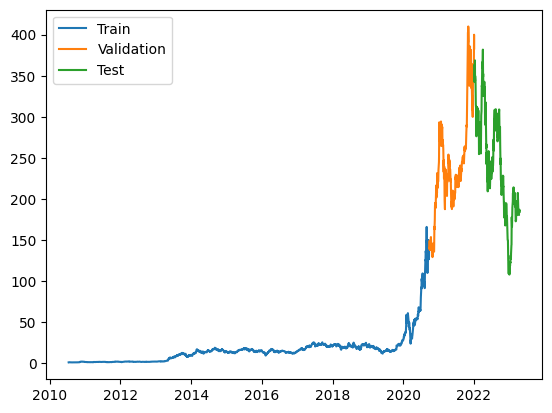

In [9]:
#Split the data into training, validation, and testing
q_80 = int(len(dates)* .8)
q_90 = int(len(dates)* .9)

dates_train, X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:] 

plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)

plt.legend(['Train', 'Validation', 'Test'])

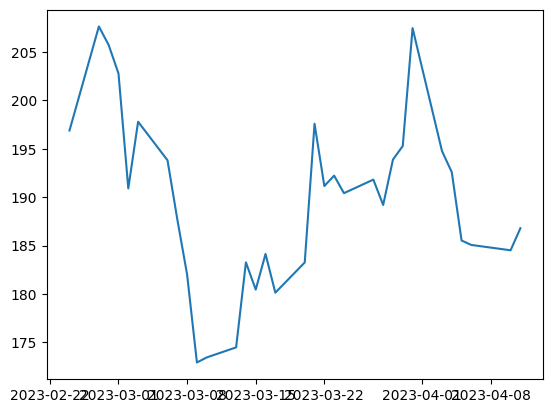

In [ ]:
plt.plot(dates_test, Y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Applying early stop
# Early stop help allows the training model to be stopped
# when the validation loss stoped improving, which will help
# the model from overfitting to the training data
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, Y_train, validation_data =(X_val, Y_val), epochs =100, callbacks=[early_stop])

Epoch 1/100
81/81 [==============================] - 5s 13ms/step - loss: 451.7646 - mean_absolute_error: 10.9599 - val_loss: 52666.3789 - val_mean_absolute_error: 220.5529
Epoch 2/100
81/81 [==============================] - 0s 5ms/step - loss: 143.4503 - mean_absolute_error: 2.5892 - val_loss: 31201.3516 - val_mean_absolute_error: 164.9258
Epoch 3/100
81/81 [==============================] - 0s 6ms/step - loss: 23.9287 - mean_absolute_error: 1.0420 - val_loss: 19727.6016 - val_mean_absolute_error: 125.4768
Epoch 4/100
81/81 [==============================] - 0s 6ms/step - loss: 6.2109 - mean_absolute_error: 0.7537 - val_loss: 16173.8613 - val_mean_absolute_error: 110.4291
Epoch 5/100
81/81 [==============================] - 0s 5ms/step - loss: 3.4001 - mean_absolute_error: 0.6922 - val_loss: 14460.8516 - val_mean_absolute_error: 102.7400
Epoch 6/100
81/81 [==============================] - 0s 6ms/step - loss: 2.5757 - mean_absolute_error: 0.6300 - val_loss: 13437.8057 - val_mean_abso

In [ ]:
loss, mae = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test MAE:', mae)


11/11 [==============================] - 0s 4ms/step - loss: 14704.5918 - mean_absolute_error: 101.7985
Test loss: 14704.591796875
Test MAE: 101.7984848022461


In [ ]:
y_pred_persistence = np.roll(Y_test, 1)
y_pred_persistence[0] = Y_train[-1]
test_loss_persistence = np.mean((Y_test - y_pred_persistence)**2)
test_mae_persistence = np.mean(np.abs(Y_test - y_pred_persistence))
print('Test loss (persistence):', test_loss_persistence)
print('Test MAE (persistence):', test_mae_persistence)

Test loss (persistence): 259.03854
Test MAE (persistence): 8.167008


80/80 [==============================] - 1s 3ms/step


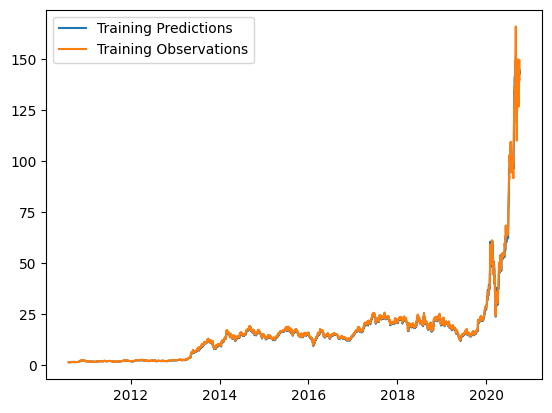

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Observations'])

10/10 [==============================] - 0s 3ms/step


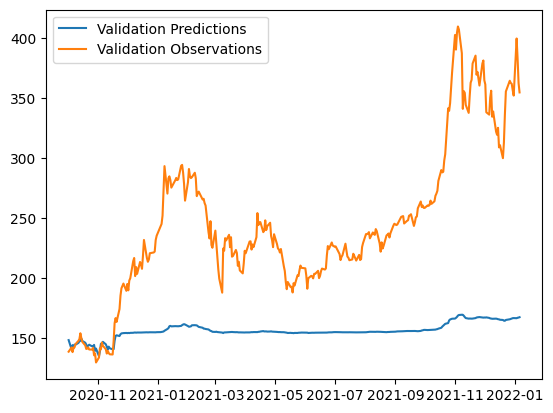

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 4ms/step


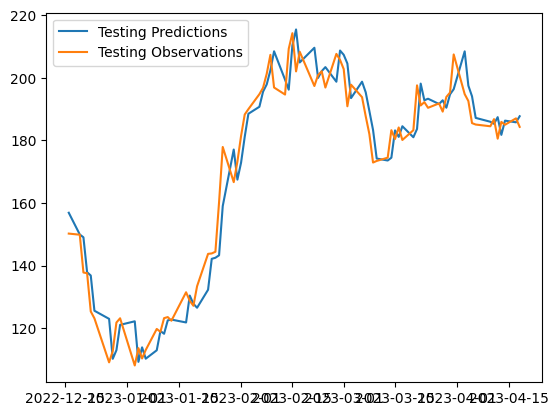

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

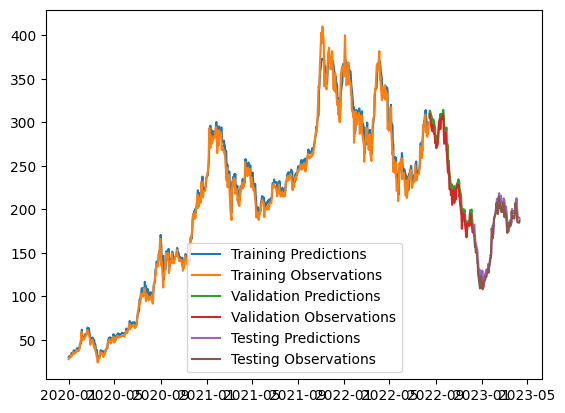

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
import pandas as pd

# Define a dictionary to store the results
results = {'n': [3, 5, 7, 10, 14, 20, 25, 28],
           'loss': [2.4017, 2.2490, 2.4085, 2.3394, 2.4106, 2.7353, 2.2801, 2.1610],
           'mae': [0.5988, 0.5767, 0.6685, 0.6174, 0.6595, 0.8057, 0.6481, 0.5639]}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Set the index to be the 'n' column
results_df.set_index('n', inplace=True)

# Display the results table
print(results_df)


      loss     mae
n                 
3   2.4017  0.5988
5   2.2490  0.5767
7   2.4085  0.6685
10  2.3394  0.6174
14  2.4106  0.6595
20  2.7353  0.8057
25  2.2801  0.6481
28  2.1610  0.5639


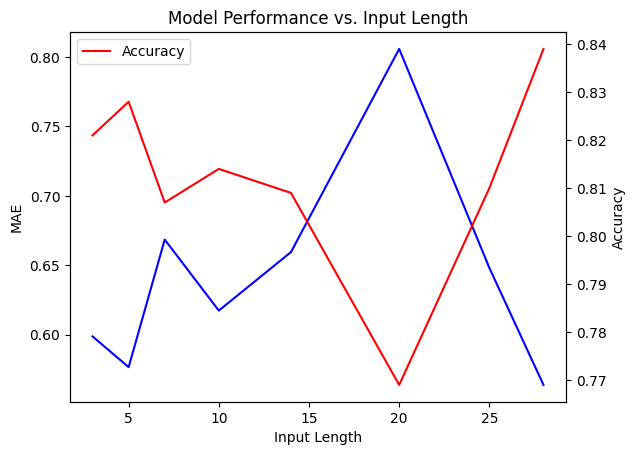

In [ ]:
import matplotlib.pyplot as plt

input_lengths = [3, 5, 7, 10, 14, 20, 25, 28]
mae_values = [0.5988, 0.5767, 0.6685, 0.6174, 0.6595, 0.8057, 0.6481, 0.5639]
accuracy_values = [0.821, 0.828, 0.807, 0.814, 0.809, 0.769, 0.810, 0.839]

fig, ax1 = plt.subplots()

# plot MAE values
ax1.set_xlabel('Input Length')
ax1.set_ylabel('MAE')
ax1.plot(input_lengths, mae_values, label='MAE', color='blue')

# add second y-axis for accuracy values
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy')
ax2.plot(input_lengths, accuracy_values, label='Accuracy', color='red')

plt.title('Model Performance vs. Input Length')
plt.legend()
plt.show()
